In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path as path
import numpy as np

In [2]:
### load the data
def load_data(filename, folder="data/main_fig1/"):
    file_path = path.join(folder, filename)
    return np.loadtxt(fname=file_path)
# low affinity: 
"""
Eba = 8
Ebb = 9
f0 = 10
kon = 1e20
l0=100
"""
t_record_low = load_data("low_aff_traj_t_record.txt")
spec_record_low = load_data("low_aff_traj_spec_record.txt")
tlist_low = load_data("low_aff_lifetime_statistics.txt")
naglist_low = load_data("low_aff_nag_statistics.txt")

# high affinity
"""
Eba = 8
Ebb = 9.5
f0 = 10
kon = 1e20
l0=100
"""
t_record_high = load_data("high_aff_traj_t_record.txt")
spec_record_high = load_data("high_aff_traj_spec_record.txt")
tlist_high = load_data("high_aff_lifetime_statistics.txt")
naglist_high = load_data("high_aff_nag_statistics.txt")





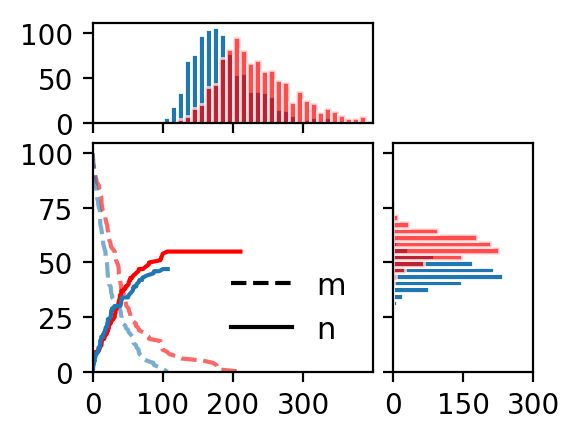

In [3]:
fig, ax = plt.subplots(figsize=(3,2.3), dpi=200)
plt.plot([-1], [-1], '--k', label="m")
plt.plot([-1], [-1], '-k', label="n")
plt.plot(t_record_high, spec_record_high[:,0], '--', color="r", ms=3, fillstyle="none", alpha=0.6)
plt.plot(t_record_low, spec_record_low[:,0], '--', color="C0", ms=3, fillstyle="none", alpha=0.6)

plt.plot(t_record_high, spec_record_high[:,1], '-', color="r",  ms=3, fillstyle="none")
plt.plot(t_record_low, spec_record_low[:,1], '-', color="C0",  ms=3, fillstyle="none")


plt.legend(frameon=False, fontsize=11)

divider = make_axes_locatable(ax)
axHistx = divider.append_axes("top", size=0.5, pad=0.1, sharex=ax,)
axHisty = divider.append_axes("right", size=0.7, pad=0.1, sharey=ax)

axHistx.xaxis.set_tick_params(labelbottom=False)
axHisty.yaxis.set_tick_params(labelleft=False)

bins1 = np.arange(0, 500, 10)
bins2 = np.arange(0, 100, 3)
axHistx.hist(tlist_low, bins=bins1, ec="w", color="C0")
axHistx.hist(tlist_high, bins=bins1, ec="w", color="r", alpha=0.7)


axHisty.hist(naglist_low[0], bins=bins2, orientation='horizontal', ec="w", color="C0")
axHisty.hist(naglist_high[0], bins=bins2, orientation='horizontal', ec="w", color="r", alpha=0.7)

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

count_ticks = [0, 50, 100]
count_ticks_y = [0, 150, 300]
axHistx.set_yticks(count_ticks)
axHistx.set_yticklabels(count_ticks, fontsize=10)
axHisty.set_xticks(count_ticks_y)
axHisty.set_xticklabels(count_ticks_y, fontsize=10)

# ax.set_xlabel("time, t [s]")
# ax.set_ylabel("complex number")
ax.set_xlim(0, 400)
ax.set_ylim(0, 105)
ax.set_yticks([0, 25,50, 75, 100])
ax.set_xticks([0,  100,200,300])
#plt.legend()
plt.tight_layout()
#plt.savefig("figs/main_fig1/traj.pdf", format='pdf')
plt.show()